#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


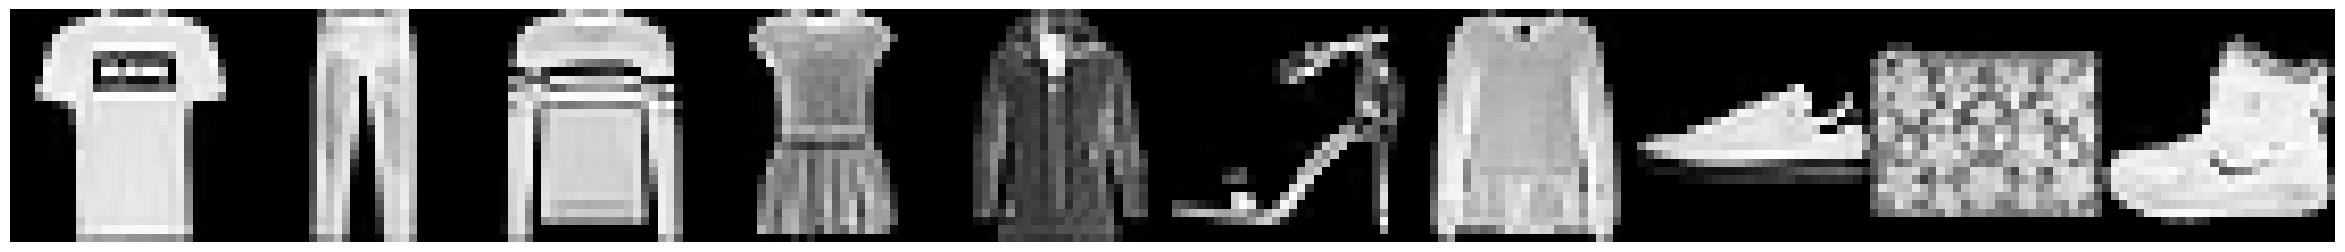

In [ ]:
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

imgs = np.concatenate(imgs, axis=1)

plt.figure(figsize=(30, 6))

plt.imshow(imgs, cmap='Greys_r')

plt.grid(False)

plt.axis('off')

plt.show()

### **Нормализация данных**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### **Создание нейронных сетей**

In [ ]:
def model(neuron, is_dropout, drops, results):
  model = Sequential()
  model.add(Dense(neuron, activation = 'relu', input_dim=784))
  if is_dropout == True: model.add(Dropout(drops))
  model.add(Dense(neuron // 2, activation='relu'))
  if is_dropout == True: model.add(Dropout(drops))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
  model.fit(x_train, y_train, batch_size = 128, epochs=10, validation_split=0.2, verbose=1, shuffle=True)
  acc_test = model.evaluate(x_test, y_test)
  results.append(('Number of neurons:', neuron, 'Accuracy:', acc_test[1], 'Dropout: ', is_dropout, 'indicator of dropout: ', drops))

In [ ]:
results = []
model1 = model(600, False, 0, results)
model2 = model(600, True, 0.1, results)
model3 = model(600, True, 0.3, results)
model4 = model(600, True, 0.5, results)
model5 = model(600, True, 0.7, results)
model6 = model(300, False, 0, results)
model7 = model(300, True, 0.1, results)
model8 = model(300, True, 0.3, results)
model9 = model(300, True, 0.5, results)
model10 = model(300, True, 0.7, results)

Epoch 1/10
375/375 [==============================] - 8s 6ms/step - loss: 0.5006 - accuracy: 0.8224 - val_loss: 0.4066 - val_accuracy: 0.8528
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3624 - accuracy: 0.8678 - val_loss: 0.3729 - val_accuracy: 0.8618
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3217 - accuracy: 0.8807 - val_loss: 0.3408 - val_accuracy: 0.8751
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2974 - accuracy: 0.8906 - val_loss: 0.3451 - val_accuracy: 0.8740
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2757 - accuracy: 0.8970 - val_loss: 0.3128 - val_accuracy: 0.8869
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2630 - accuracy: 0.9010 - val_loss: 0.3116 - val_accuracy: 0.8877
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2509 - accuracy: 0.9057 - val_loss: 0.3206 - val_accuracy: 0.8827
Epoch 

In [ ]:
for i in results:
  print(i)

('Кол-во нейронов:', 600, 'Точность:', 0.8848999738693237, 'Dropout: ', False, 'Показатель dropout: ', 0)
('Кол-во нейронов:', 600, 'Точность:', 0.8783000111579895, 'Dropout: ', True, 'Показатель dropout: ', 0.1)
('Кол-во нейронов:', 600, 'Точность:', 0.8745999932289124, 'Dropout: ', True, 'Показатель dropout: ', 0.3)
('Кол-во нейронов:', 600, 'Точность:', 0.8734999895095825, 'Dropout: ', True, 'Показатель dropout: ', 0.5)
('Кол-во нейронов:', 600, 'Точность:', 0.8608999848365784, 'Dropout: ', True, 'Показатель dropout: ', 0.7)
('Кол-во нейронов:', 300, 'Точность:', 0.8709999918937683, 'Dropout: ', False, 'Показатель dropout: ', 0)
('Кол-во нейронов:', 300, 'Точность:', 0.8805000185966492, 'Dropout: ', True, 'Показатель dropout: ', 0.1)
('Кол-во нейронов:', 300, 'Точность:', 0.8758000135421753, 'Dropout: ', True, 'Показатель dropout: ', 0.3)
('Кол-во нейронов:', 300, 'Точность:', 0.8705999851226807, 'Dropout: ', True, 'Показатель dropout: ', 0.5)
('Кол-во нейронов:', 300, 'Точность:', 